# Problem Statement: Traveling Salesman Problem (TSP) using OR-Tools




The Traveling Salesman Problem (TSP) is a classic optimization problem where the objective is to find the shortest possible route that visits each city exactly once and returns to the starting city.  

In this mini-project, we solve the TSP using **Google OR-Tools**, a powerful optimization library.  
We also visualize the optimized path using **Matplotlib**.

**Key Points:**
- Input: A set of cities with their coordinates.  
- Task: Find the minimum distance route that visits all cities.  
- Output: Optimized route and its visualization.

In [ ]:
!pip install ortools


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.7/27.7 MB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.1/321.1 kB 20.1 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.19.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.3, but you have protobuf 6.31.1 which is incompatible.
google-ai-generativelanguage 0.6.15 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.

Optimal Route: [0, 1, 2, 4, 5, 3, 0]


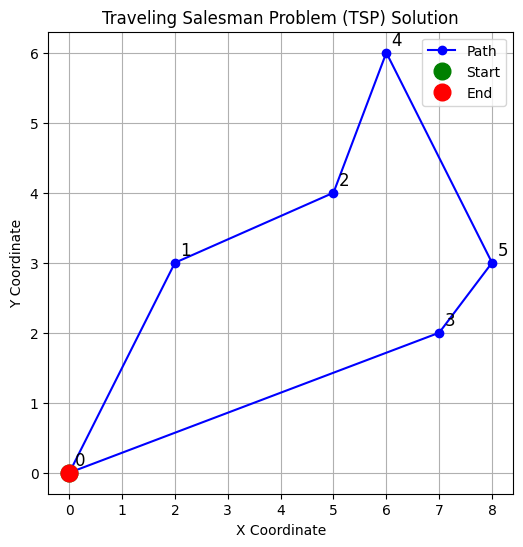

In [ ]:
from ortools.constraint_solver import pywrapcp, routing_enums_pb2
import matplotlib.pyplot as plt

# Sample data for cities (x, y coordinates)
locations = [
    (0, 0), (2, 3), (5, 4), (7, 2), (6, 6), (8, 3)
]

def create_distance_matrix(locations):
    """Creates distance matrix for TSP"""
    size = len(locations)
    matrix = {}
    for i in range(size):
        matrix[i] = {}
        for j in range(size):
            if i == j:
                matrix[i][j] = 0
            else:
                matrix[i][j] = int(((locations[i][0] - locations[j][0]) ** 2 +
                                    (locations[i][1] - locations[j][1]) ** 2) ** 0.5)
    return matrix

# Create distance matrix
distance_matrix = create_distance_matrix(locations)

# OR-Tools Routing
manager = pywrapcp.RoutingIndexManager(len(distance_matrix), 1, 0)
routing = pywrapcp.RoutingModel(manager)

def distance_callback(from_index, to_index):
    """Returns distance between nodes"""
    return distance_matrix[manager.IndexToNode(from_index)][manager.IndexToNode(to_index)]

transit_callback_index = routing.RegisterTransitCallback(distance_callback)
routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

# Search parameters
search_parameters = pywrapcp.DefaultRoutingSearchParameters()
search_parameters.first_solution_strategy = routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC

# Solve
solution = routing.SolveWithParameters(search_parameters)

# Extract solution
def get_solution(manager, routing, solution):
    index = routing.Start(0)
    plan = []
    while not routing.IsEnd(index):
        plan.append(manager.IndexToNode(index))
        index = solution.Value(routing.NextVar(index))
    plan.append(manager.IndexToNode(index))
    return plan

route = get_solution(manager, routing, solution)

print("Optimal Route:", route)

# -------------------------------
# Visualization using Matplotlib
# -------------------------------
x = [locations[i][0] for i in route]
y = [locations[i][1] for i in route]

plt.figure(figsize=(6, 6))
plt.plot(x, y, 'bo-', label="Path")  # blue nodes connected
plt.plot(locations[0][0], locations[0][1], 'go', markersize=12, label="Start")  # start node green
plt.plot(locations[route[-1]][0], locations[route[-1]][1], 'ro', markersize=12, label="End")  # end node red

for i, (x_coord, y_coord) in enumerate(locations):
    plt.text(x_coord + 0.1, y_coord + 0.1, str(i), fontsize=12)

plt.title("Traveling Salesman Problem (TSP) Solution")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend()
plt.grid(True)
plt.show()
